<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [9]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [10]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.939114,58.070066,72.280610,0.712525,235.002314,232.966635,2.035679
1,0.0,1.0,88.961797,60.840648,49.155918,-6.676809,202.281554,207.398317,-5.116763
2,0.0,2.0,23.312397,30.419057,94.230657,0.844906,158.807016,159.227916,-0.420899
3,0.0,3.0,20.971782,41.975596,97.809276,-0.466106,170.290548,171.746062,-1.455514
4,0.0,4.0,21.953560,25.335170,28.014716,7.860543,93.163989,86.032089,7.131901
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,72.970108,23.561249,99.127909,-7.362761,198.296504,200.431723,-2.135218
29996,999.0,26.0,91.258425,61.317351,30.886915,4.872805,198.335497,197.840558,0.494939
29997,999.0,27.0,63.897909,73.873179,37.897401,4.108710,189.777199,190.336572,-0.559373
29998,999.0,28.0,65.936755,99.478427,66.208416,5.442613,247.066211,245.688769,1.377443


In [11]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.939114,58.070066,72.280610,0.712525,235.002314,232.966635,2.035679
1,0.0,1.0,88.961797,60.840648,49.155918,-6.676809,202.281554,207.398317,-5.116763
2,0.0,2.0,23.312397,30.419057,94.230657,0.844906,158.807016,159.227916,-0.420899
3,0.0,3.0,20.971782,41.975596,97.809276,-0.466106,170.290548,171.746062,-1.455514
4,0.0,4.0,21.953560,25.335170,28.014716,7.860543,93.163989,86.032089,7.131901
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,72.970108,23.561249,99.127909,-7.362761,198.296504,200.431723,-2.135218
29996,999.0,26.0,91.258425,61.317351,30.886915,4.872805,198.335497,197.840558,0.494939
29997,999.0,27.0,63.897909,73.873179,37.897401,4.108710,189.777199,190.336572,-0.559373
29998,999.0,28.0,65.936755,99.478427,66.208416,5.442613,247.066211,245.688769,1.377443


In [12]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.939114  58.070066  72.280610  ...  235.002314  232.966635  2.035679
      1.0    88.961797  60.840648  49.155918  ...  202.281554  207.398317 -5.116763
      2.0    23.312397  30.419057  94.230657  ...  158.807016  159.227916 -0.420899
      3.0    20.971782  41.975596  97.809276  ...  170.290548  171.746062 -1.455514
      4.0    21.953560  25.335170  28.014716  ...   93.163989   86.032089  7.131901
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   72.970108  23.561249  99.127909  ...  198.296504  200.431723 -2.135218
      26.0   91.258425  61.317351  30.886915  ...  198.335497  197.840558  0.494939
      27.0   63.897909  73.873179  37.897401  ...  189.777199  190.336572 -0.559373
      28.0   65.936755  99.478427  66.208416  ...  247.066211  245.688769  1.377443
      29.0   24.044840  22.794545  40.165781  ...   97.063037   97.205017 -0.141980

[30000 rows x 7 columns]

In [13]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.939114  58.070066  72.280610  ...  235.002314  232.966635  2.035679
      1.0    88.961797  60.840648  49.155918  ...  202.281554  207.398317 -5.116763
      2.0    23.312397  30.419057  94.230657  ...  158.807016  159.227916 -0.420899
      3.0    20.971782  41.975596  97.809276  ...  170.290548  171.746062 -1.455514
      4.0    21.953560  25.335170  28.014716  ...   93.163989   86.032089  7.131901
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   72.970108  23.561249  99.127909  ...  198.296504  200.431723 -2.135218
      26.0   91.258425  61.317351  30.886915  ...  198.335497  197.840558  0.494939
      27.0   63.897909  73.873179  37.897401  ...  189.777199  190.336572 -0.559373
      28.0   65.936755  99.478427  66.208416  ...  247.066211  245.688769  1.377443
      29.0   24.044840  22.794545  40.165781  ...   97.063037   97.205017 -0.141980

[30000 rows x 7 columns]

In [14]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.939114,58.070066,72.280610,0.712525,235.002314,232.966635,2.035679
1,0.0,1.0,88.961797,60.840648,49.155918,-6.676809,202.281554,207.398317,-5.116763
2,0.0,2.0,23.312397,30.419057,94.230657,0.844906,158.807016,159.227916,-0.420899
3,0.0,3.0,20.971782,41.975596,97.809276,-0.466106,170.290548,171.746062,-1.455514
4,0.0,4.0,21.953560,25.335170,28.014716,7.860543,93.163989,86.032089,7.131901
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,72.970108,23.561249,99.127909,-7.362761,198.296504,200.431723,-2.135218
29996,999.0,26.0,91.258425,61.317351,30.886915,4.872805,198.335497,197.840558,0.494939
29997,999.0,27.0,63.897909,73.873179,37.897401,4.108710,189.777199,190.336572,-0.559373
29998,999.0,28.0,65.936755,99.478427,66.208416,5.442613,247.066211,245.688769,1.377443


In [15]:
table.set_index(['rep', 'index'], inplace=True)

In [16]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.939114  58.070066  72.280610  ...  235.002314  232.966635  2.035679
      1.0    88.961797  60.840648  49.155918  ...  202.281554  207.398317 -5.116763
      2.0    23.312397  30.419057  94.230657  ...  158.807016  159.227916 -0.420899
      3.0    20.971782  41.975596  97.809276  ...  170.290548  171.746062 -1.455514
      4.0    21.953560  25.335170  28.014716  ...   93.163989   86.032089  7.131901
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   72.970108  23.561249  99.127909  ...  198.296504  200.431723 -2.135218
      26.0   91.258425  61.317351  30.886915  ...  198.335497  197.840558  0.494939
      27.0   63.897909  73.873179  37.897401  ...  189.777199  190.336572 -0.559373
      28.0   65.936755  99.478427  66.208416  ...  247.066211  245.688769  1.377443
      29.0   24.044840  22.794545  40.165781  ...   97.063037   97.205017 -0.141980

[30000 rows x 7 columns]

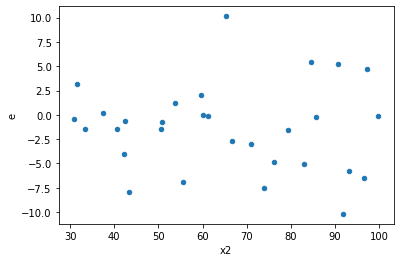

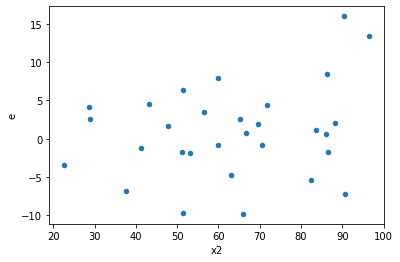

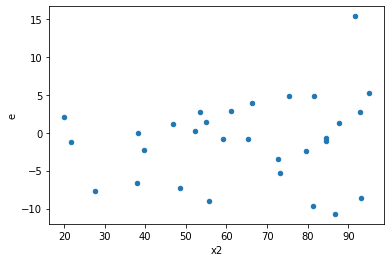

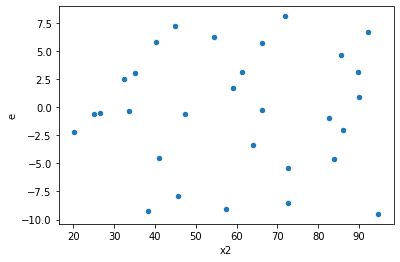

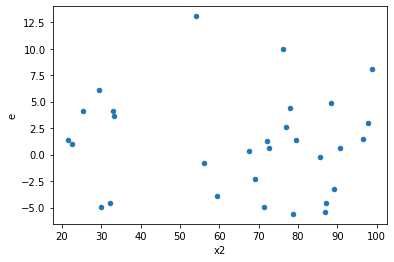

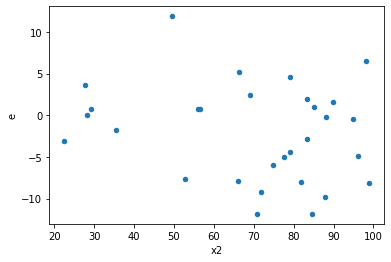

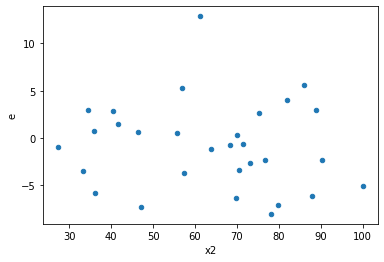

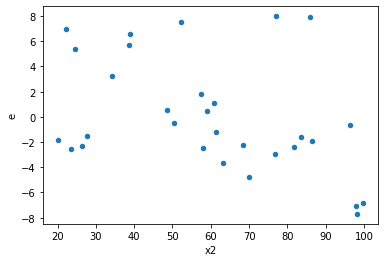

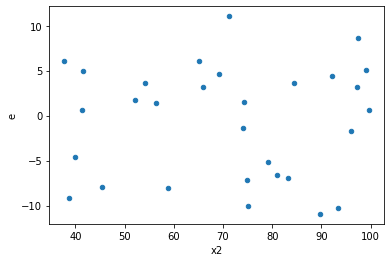

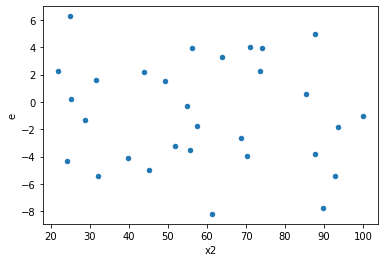

In [17]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [18]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,63.11290595153913,378.8118859417388,7.01254510572657,42.09020954908209,6.002130312817592,0.013514185271025436,0.9932429073644873,0.006757092635512718,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,56.82315471205463,253.88877600573,6.313683856894959,28.209864000636667,4.468051400741207,0.03609733156273531,0.9819513342186323,0.018048665781367657,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,99.61321758886584,321.89050658187074,11.06813528765176,35.76561184243008,3.231403566446484,0.09551246693777804,0.952243766531111,0.04775623346888902,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,104.36654849141573,176.61737588691452,11.596283165712858,19.624152876323834,1.6922795516366194,0.44527925534688473,0.7773603723265576,0.22263962767344236,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,99.87867397624541,140.2350991331903,11.097630441805045,15.581677681465587,1.4040544747975232,0.6213185081551074,0.6893407459224463,0.3106592540775537,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,138.2047307061997,386.8270814519988,15.356081189577745,42.98078682799987,2.7989424057728454,0.14122132284570799,0.929389338577146,0.07061066142285399,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,76.65158741643215,179.0612599782435,8.516843046270239,19.895695553138168,2.336041118175947,0.22225291696091465,0.8888735415195427,0.11112645848045732,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,84.28568735844209,135.56206854626768,9.365076373160232,15.062452060696408,1.6083640389590976,0.490062299460889,0.7549688502695555,0.2450311497304445,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,94.85363279438475,204.24844800174762,10.539292532709418,22.69427200019418,2.153301270437361,0.26865969232921705,0.8656701538353915,0.13432984616460852,Reject005=1 : Homoscedasticity


In [20]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,63.11290595153913,378.8118859417388,7.01254510572657,42.09020954908209,6.002130312817592,0.013514185271025436,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,56.82315471205463,253.88877600573,6.313683856894959,28.209864000636667,4.468051400741207,0.03609733156273531,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,99.61321758886584,321.89050658187074,11.06813528765176,35.76561184243008,3.231403566446484,0.09551246693777804,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,104.36654849141573,176.61737588691452,11.596283165712858,19.624152876323834,1.6922795516366194,0.44527925534688473,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,99.87867397624541,140.2350991331903,11.097630441805045,15.581677681465587,1.4040544747975232,0.6213185081551074,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,138.2047307061997,386.8270814519988,15.356081189577745,42.98078682799987,2.7989424057728454,0.14122132284570799,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,217.36893177641682,166.23684668024765,24.152103530712978,18.470760742249738,0.7647681999524981,0.696012782913309,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,76.65158741643215,179.0612599782435,8.516843046270239,19.895695553138168,2.336041118175947,0.22225291696091465,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,157.04417335362908,88.23072770996316,17.449352594847674,9.803414189995907,0.56182108400346,0.40334682092219787,Reject005=1 : Homoscedasticity


In [21]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      826
Reject005=0 : Heteroscedasticity    174
Name: Result_test, dtype: int64